In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 18


In [2]:
# 1. Data Loading and Initial Inspection
try:
    df = pd.read_csv('cars24.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'cars24.csv' not found. Please ensure the file path is correct.")
    exit()

print("\nFirst 5 rows of the dataset:")
print(df.head())

print("\nDataset Information:")
df.info()

print("\nMissing values before cleaning:")
print(df.isnull().sum())


Dataset loaded successfully!

First 5 rows of the dataset:
                      Name Kilometers Driven  Year of Manufacture Fuel Type  \
0         2012 Maruti Ritz         55.48k km                 2012    Petrol   
1         2018 Maruti Ciaz         62.83k km                 2018    Petrol   
2  2016 Maruti Wagon R 1.0         17.64k km                 2016    Petrol   
3  2013 Maruti Swift Dzire           1.0L km                 2013    Petrol   
4       2015 Maruti Ertiga         55.49k km                 2015    Petrol   

  Transmission Type         Price             Location     Owners  
0            Manual  â‚¹2.04 lakh    Kandivali, Mumbai  1st owner  
1            Manual  â‚¹5.81 lakh  Mulund West, Mumbai  1st owner  
2            Manual  â‚¹3.41 lakh  Mulund West, Mumbai  1st owner  
3            Manual  â‚¹3.36 lakh  Mulund West, Mumbai  1st owner  
4            Manual  â‚¹5.98 lakh    Kandivali, Mumbai  1st owner  

Dataset Information:
<class 'pandas.core.frame.DataFrame'

In [3]:
# 2. Data Cleaning and Preprocessing

# Function to convert 'Kilometers Driven' to numeric
def convert_kilometers(km_str):
    if isinstance(km_str, str):
        km_str = km_str.replace(' ', '') # Remove any spaces
        if 'kkm' in km_str:
            return float(km_str.replace('kkm', '')) * 1000
        elif 'Lkm' in km_str:
            return float(km_str.replace('Lkm', '')) * 100000
        elif 'km' in km_str:
            return float(km_str.replace('km', ''))
    return float(km_str) # Already numeric or can be converted directly

df['Kilometers Driven'] = df['Kilometers Driven'].apply(convert_kilometers)

# Function to convert 'Price' to numeric
def convert_price(price_str):
    if isinstance(price_str, str):
        price_str = price_str.replace('â‚¹', '').replace(' ', '')
        if 'lakh' in price_str:
            return float(price_str.replace('lakh', '')) * 100000
    return float(price_str)

df['Price'] = df['Price'].apply(convert_price)

# Extract 'Brand' and 'Model' from 'Name'
df['Brand'] = df['Name'].apply(lambda x: x.split(' ')[1] if len(x.split(' ')) > 1 else 'Other')
df['Model'] = df['Name'].apply(lambda x: ' '.join(x.split(' ')[2:]) if len(x.split(' ')) > 2 else x.split(' ')[1] if len(x.split(' ')) > 1 else 'Unknown')

# Clean 'Owners' column
df['Owners'] = df['Owners'].str.replace(' owner', '').str.replace('st', '').str.replace('nd', '').str.replace('rd', '').str.replace('th', '').astype(int)

# Extract City from Location
df['City'] = df['Location'].apply(lambda x: x.split(',')[-1].strip() if ',' in x else x.strip())

print("\nData types after cleaning:")
df.info()

print("\nFirst 5 rows after cleaning:")
print(df.head())



Data types after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 75 non-null     object 
 1   Kilometers Driven    75 non-null     float64
 2   Year of Manufacture  75 non-null     int64  
 3   Fuel Type            75 non-null     object 
 4   Transmission Type    75 non-null     object 
 5   Price                75 non-null     float64
 6   Location             75 non-null     object 
 7   Owners               75 non-null     int64  
 8   Brand                75 non-null     object 
 9   Model                75 non-null     object 
 10  City                 75 non-null     object 
dtypes: float64(2), int64(2), object(7)
memory usage: 6.6+ KB

First 5 rows after cleaning:
                      Name  Kilometers Driven  Year of Manufacture Fuel Type  \
0         2012 Maruti Ritz            55480.0  

In [4]:
# 3. Descriptive Statistics
print("\nDescriptive Statistics for Numerical Columns:")
print(df.describe())

print("\nValue Counts for Categorical Columns:")
for col in ['Fuel Type', 'Transmission Type', 'Owners', 'Brand', 'City']:
    print(f"\n--- {col} ---")
    print(df[col].value_counts())



Descriptive Statistics for Numerical Columns:
       Kilometers Driven  Year of Manufacture         Price     Owners
count          75.000000            75.000000  7.500000e+01  75.000000
mean        47003.066667          2018.200000  4.867867e+05   1.253333
std         25893.469487             2.681266  2.203141e+05   0.437849
min          2410.000000          2012.000000  2.040000e+05   1.000000
25%         25425.000000          2016.000000  3.335000e+05   1.000000
50%         48640.000000          2018.000000  4.450000e+05   1.000000
75%         66755.000000          2020.000000  6.035000e+05   1.500000
max        100000.000000          2023.000000  1.248000e+06   2.000000

Value Counts for Categorical Columns:

--- Fuel Type ---
Fuel Type
Petrol    63
CNG        9
Diesel     3
Name: count, dtype: int64

--- Transmission Type ---
Transmission Type
Manual    53
Auto      22
Name: count, dtype: int64

--- Owners ---
Owners
1    56
2    19
Name: count, dtype: int64

--- Brand ---
Bran

In [5]:
# 4. Univariate Analysis (Individual Feature Analysis)
print("\n--- Univariate Analysis ---")



--- Univariate Analysis ---


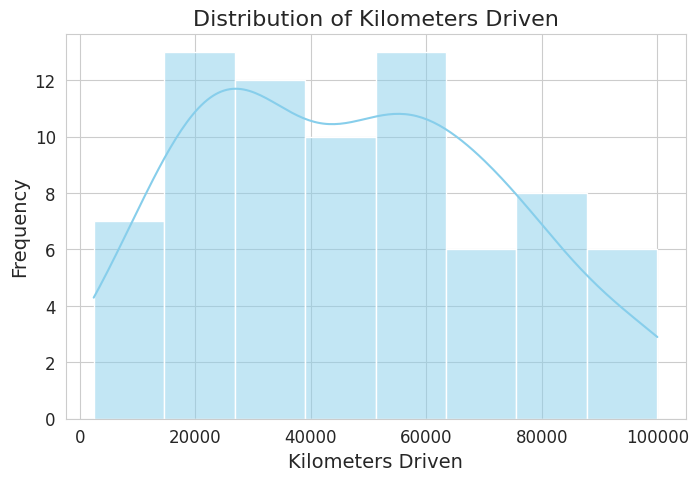

In [6]:
# Histogram: Kilometers Driven
plt.figure(figsize=(8, 5))
sns.histplot(df['Kilometers Driven'], kde=True, color='skyblue')
plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')
plt.show()


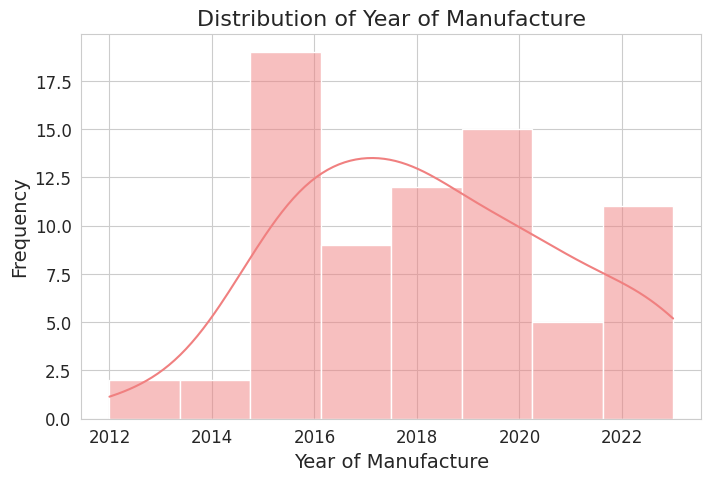

In [7]:
# Histogram: Year of Manufacture
plt.figure(figsize=(8, 5))
sns.histplot(df['Year of Manufacture'], kde=True, color='lightcoral')
plt.title('Distribution of Year of Manufacture')
plt.xlabel('Year of Manufacture')
plt.ylabel('Frequency')
plt.show()


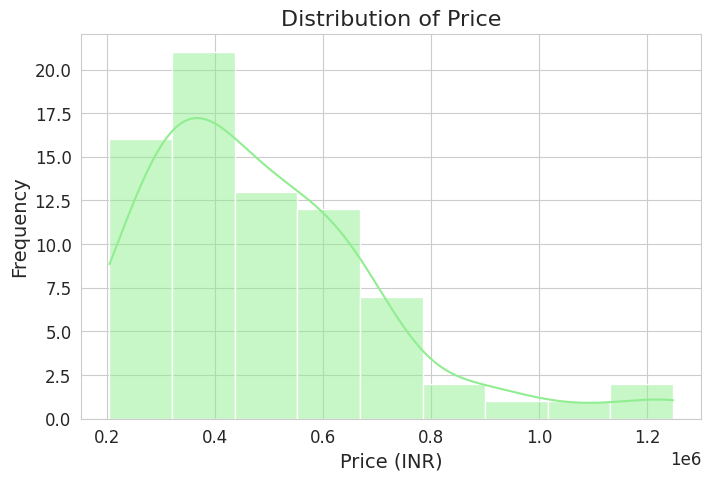

In [8]:
# Histogram: Price
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], kde=True, color='lightgreen')
plt.title('Distribution of Price')
plt.xlabel('Price (INR)')
plt.ylabel('Frequency')
plt.show()


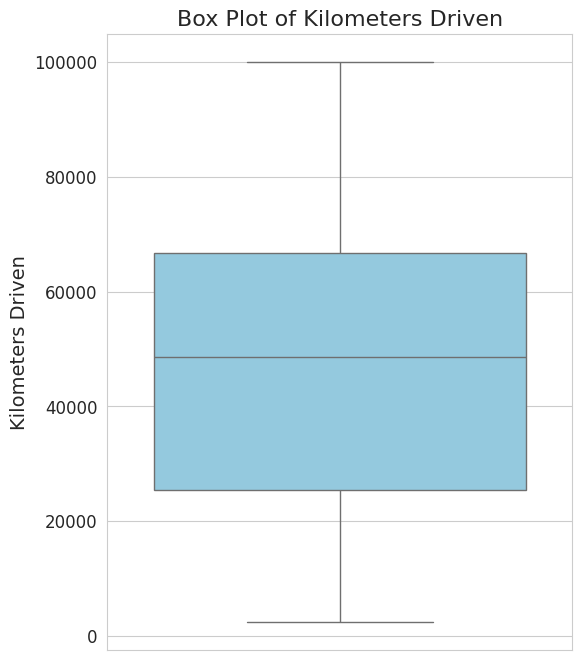

In [9]:
# Box Plot: Kilometers Driven
plt.figure(figsize=(6, 8))
sns.boxplot(y=df['Kilometers Driven'], color='skyblue')
plt.title('Box Plot of Kilometers Driven')
plt.ylabel('Kilometers Driven')
plt.show()


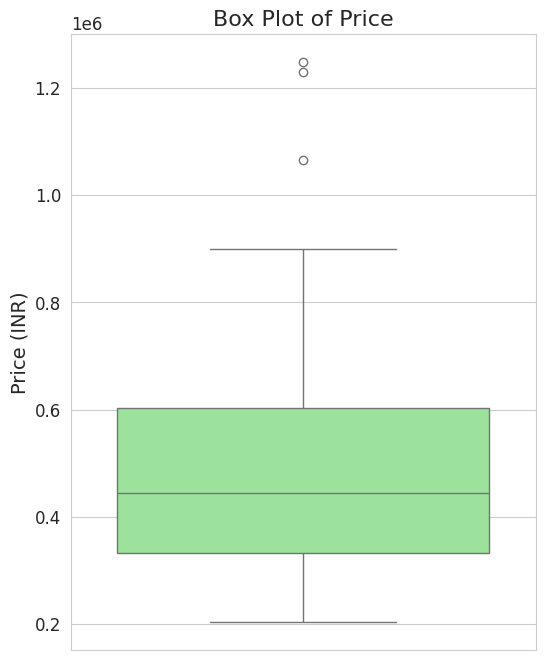

In [11]:
# Box Plot: Price
plt.figure(figsize=(6, 8))
sns.boxplot(y=df['Price'], color='lightgreen')
plt.title('Box Plot of Price')
plt.ylabel('Price (INR)')
plt.show()


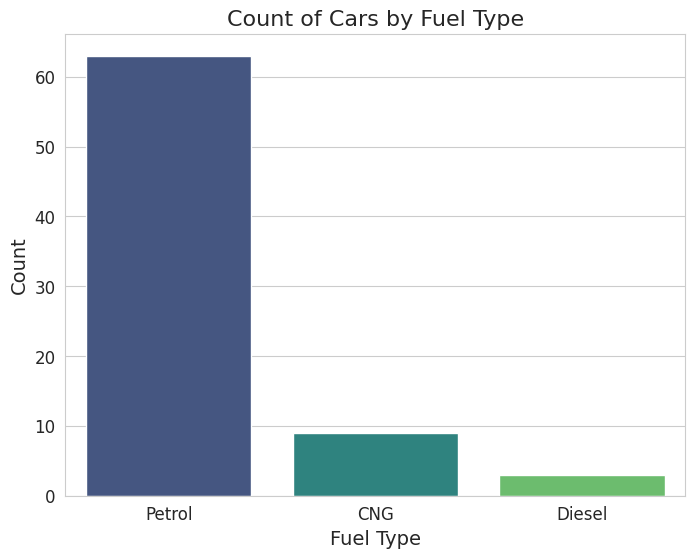

In [12]:
# Count Plot: Fuel Type
plt.figure(figsize=(8, 6))
sns.countplot(x='Fuel Type', data=df, hue='Fuel Type', palette='viridis', legend=False)
plt.title('Count of Cars by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()


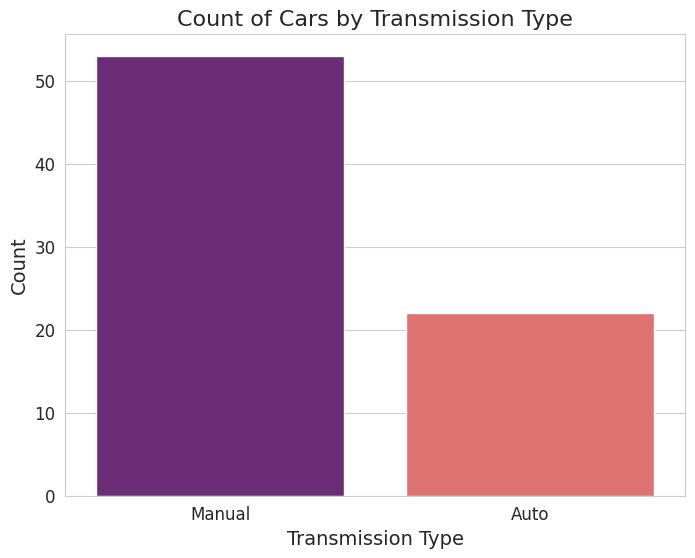

In [13]:
# Count Plot: Transmission Type
plt.figure(figsize=(8, 6))
sns.countplot(x='Transmission Type', data=df, hue='Transmission Type', palette='magma', legend=False)
plt.title('Count of Cars by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.show()


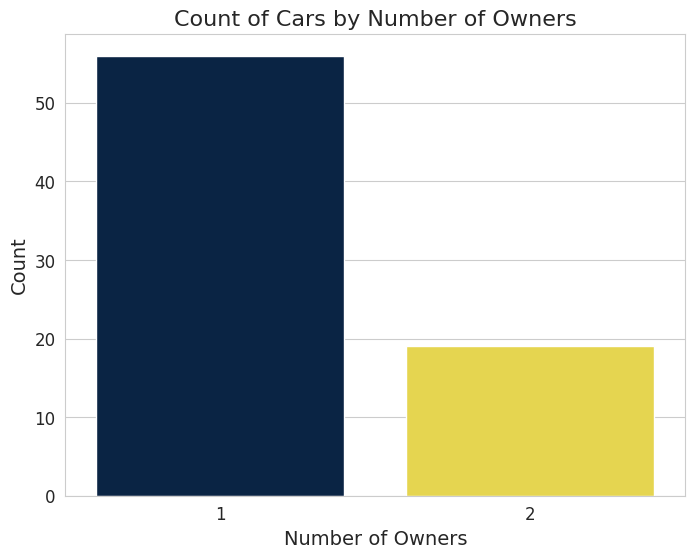

In [14]:
# Count Plot: Owners
plt.figure(figsize=(8, 6))
sns.countplot(x='Owners', data=df, hue='Owners', palette='cividis', legend=False)
plt.title('Count of Cars by Number of Owners')
plt.xlabel('Number of Owners')
plt.ylabel('Count')
plt.show()


/tmp/ipython-input-1881396162.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='City', data=df, order=df['City'].value_counts().index, palette='coolwarm')


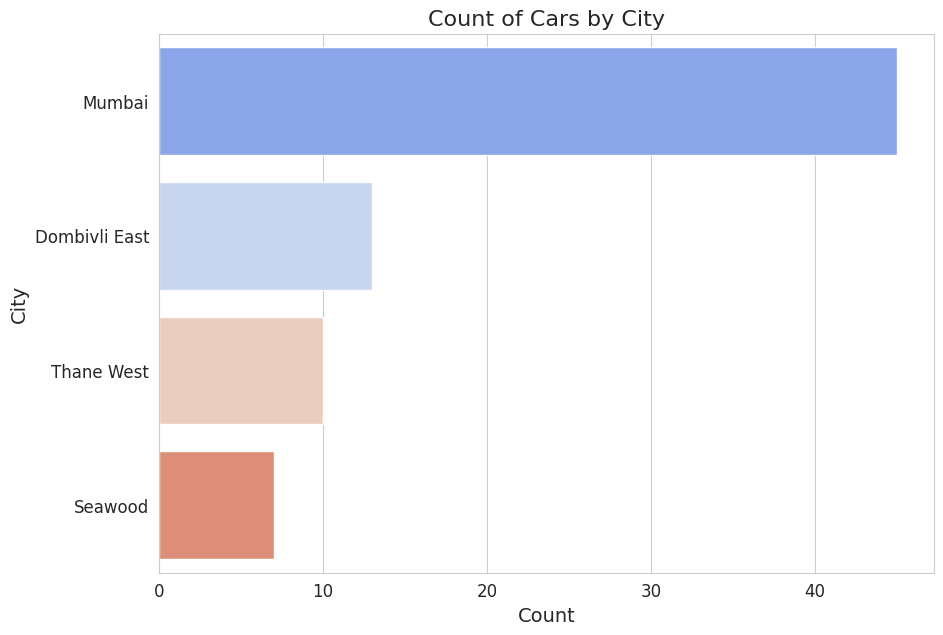

In [16]:
# Count Plot: City
plt.figure(figsize=(10, 7))
sns.countplot(y='City', data=df, order=df['City'].value_counts().index, palette='coolwarm')
plt.title('Count of Cars by City')
plt.xlabel('Count')
plt.ylabel('City')
plt.show()


In [17]:
# 5. Bivariate Analysis (Relationships Between Features)
print("\n--- Bivariate Analysis ---")



--- Bivariate Analysis ---


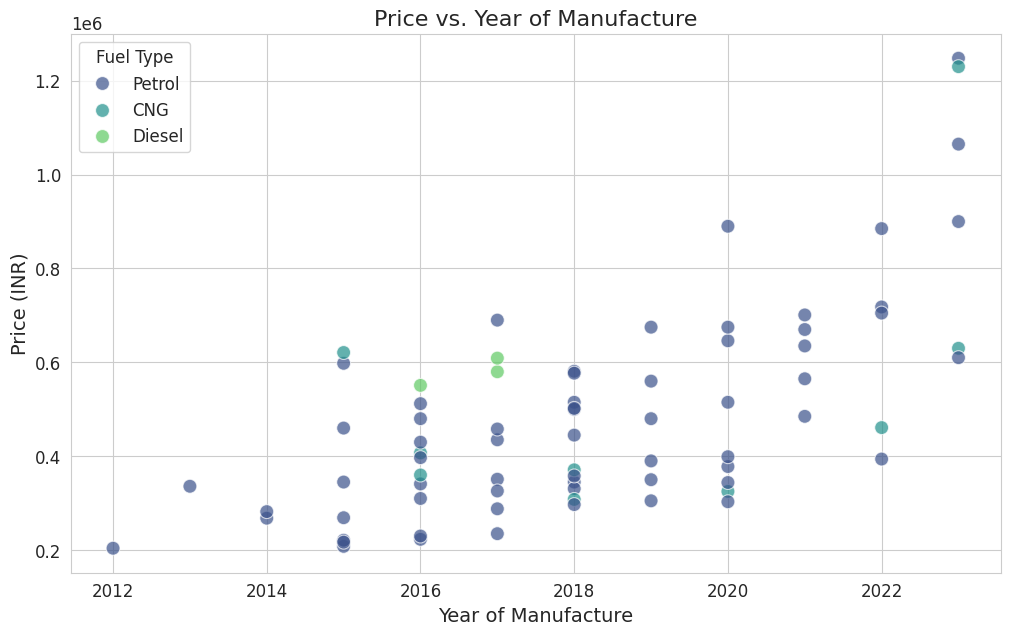

In [18]:
# Scatter Plot: Price vs. Year of Manufacture
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Year of Manufacture', y='Price', data=df, hue='Fuel Type', palette='viridis', s=100, alpha=0.7)
plt.title('Price vs. Year of Manufacture')
plt.xlabel('Year of Manufacture')
plt.ylabel('Price (INR)')
plt.show()


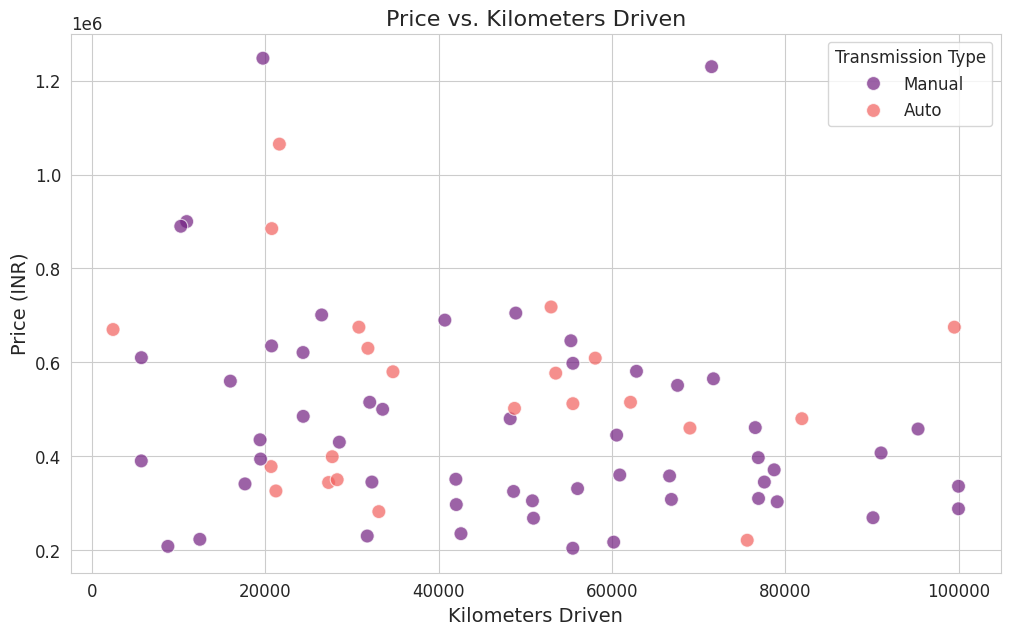

In [19]:
# Scatter Plot: Price vs. Kilometers Driven
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Kilometers Driven', y='Price', data=df, hue='Transmission Type', palette='magma', s=100, alpha=0.7)
plt.title('Price vs. Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price (INR)')
plt.show()


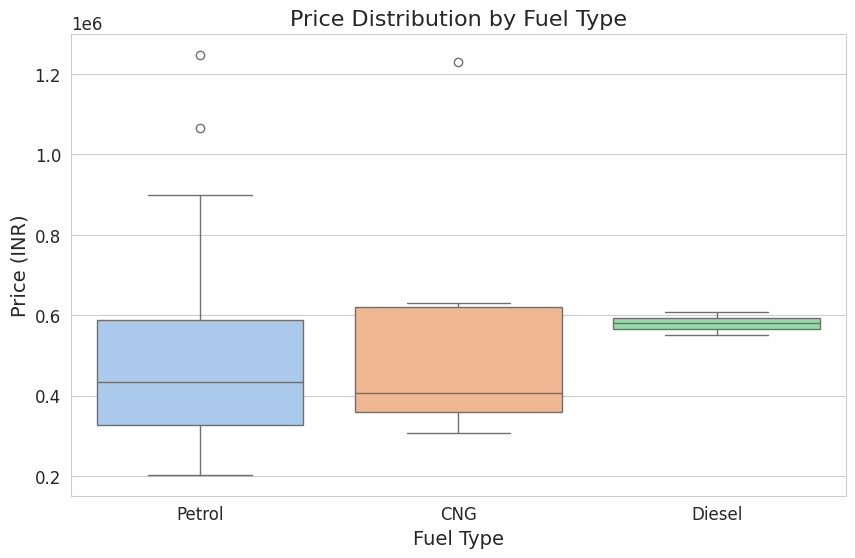

In [20]:
# Box Plot: Price Distribution by Fuel Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel Type', y='Price', data=df, hue='Fuel Type', palette='pastel', legend=False)
plt.title('Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price (INR)')
plt.show()


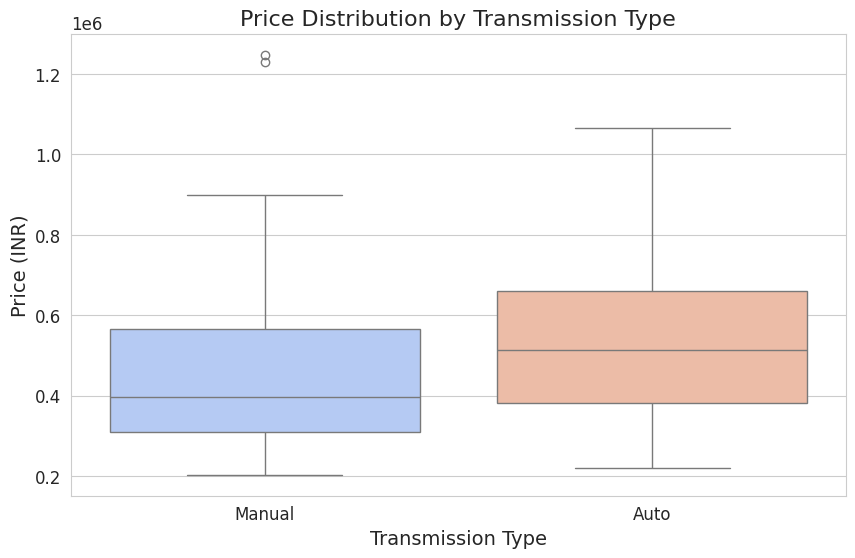

In [21]:
# Box Plot: Price Distribution by Transmission Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission Type', y='Price', data=df, hue='Transmission Type', palette='coolwarm', legend=False)
plt.title('Price Distribution by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price (INR)')
plt.show()


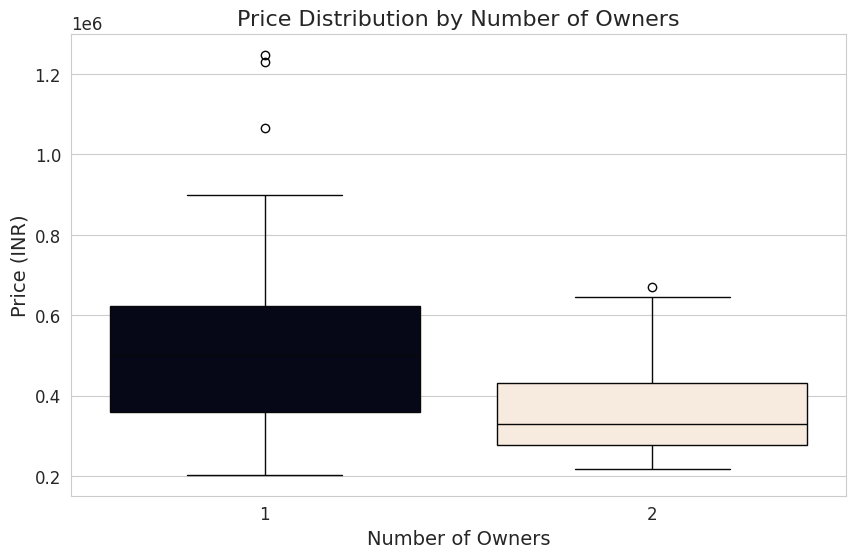

In [22]:
# Box Plot: Price Distribution by Number of Owners
plt.figure(figsize=(10, 6))
sns.boxplot(x='Owners', y='Price', data=df, hue='Owners', palette='rocket', legend=False)
plt.title('Price Distribution by Number of Owners')
plt.xlabel('Number of Owners')
plt.ylabel('Price (INR)')
plt.show()


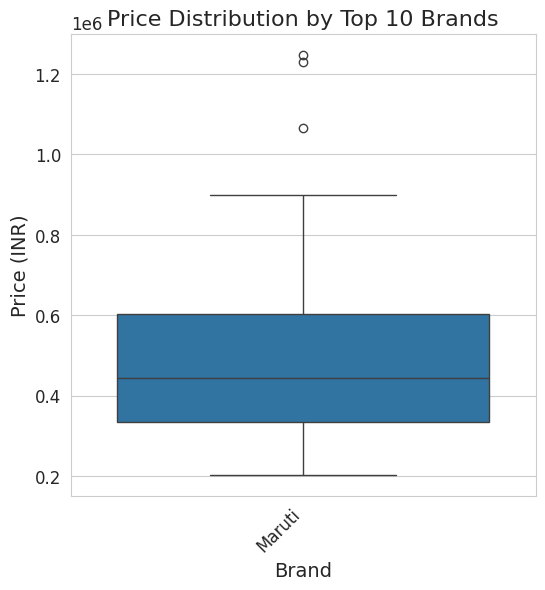

In [32]:
# Box Plot: Price Distribution by Top 10 Brands
top_brands = df['Brand'].value_counts().nlargest(10).index
plt.figure(figsize=(6, 6))
sns.boxplot(x='Brand', y='Price', data=df[df['Brand'].isin(top_brands)], hue='Brand', palette='tab10', legend=False)
plt.title('Price Distribution by Top 10 Brands')
plt.xlabel('Brand')
plt.ylabel('Price (INR)')
plt.xticks(rotation=45, ha='right')
plt.show()


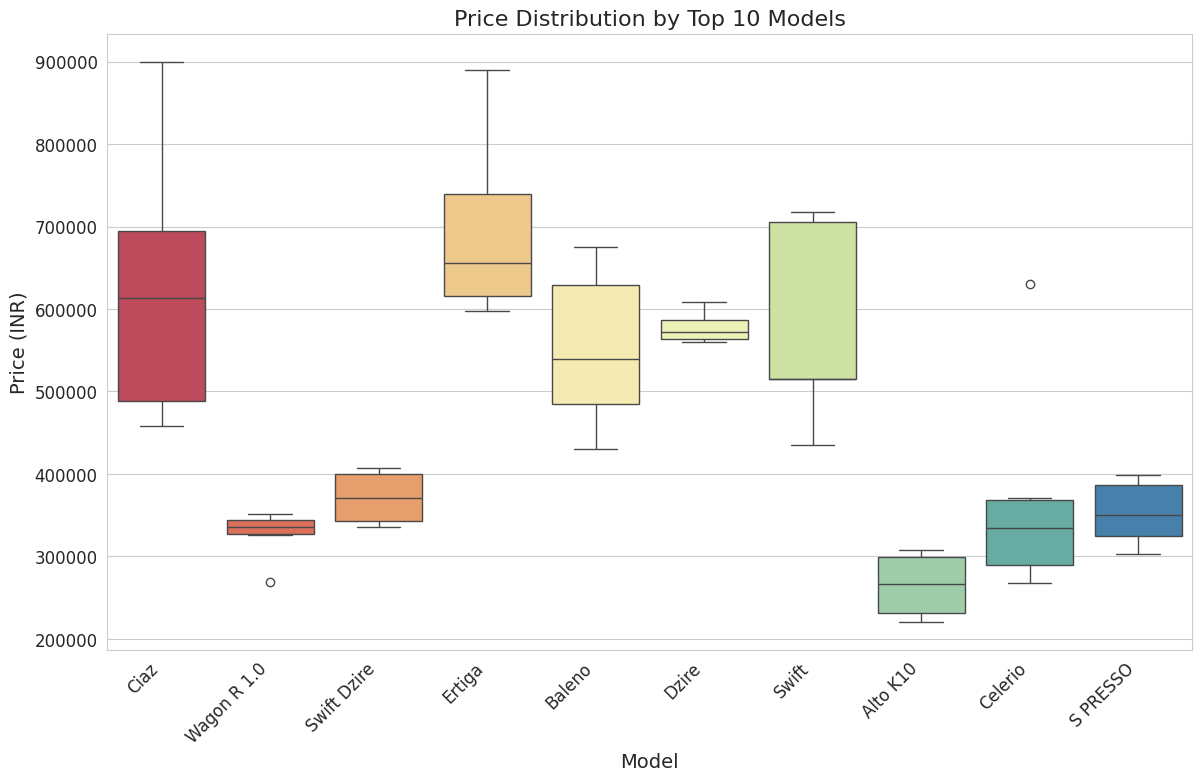

In [24]:
# Box Plot: Price Distribution by Top 10 Models
top_models = df['Model'].value_counts().nlargest(10).index
plt.figure(figsize=(14, 8))
sns.boxplot(x='Model', y='Price', data=df[df['Model'].isin(top_models)], hue='Model', palette='Spectral', legend=False)
plt.title('Price Distribution by Top 10 Models')
plt.xlabel('Model')
plt.ylabel('Price (INR)')
plt.xticks(rotation=45, ha='right')
plt.show()



--- Correlation Analysis ---

Correlation Matrix:
                     Kilometers Driven  Year of Manufacture     Price  \
Kilometers Driven             1.000000            -0.366727 -0.222559   
Year of Manufacture          -0.366727             1.000000  0.646672   
Price                        -0.222559             0.646672  1.000000   
Owners                        0.348167            -0.124316 -0.333543   

                       Owners  
Kilometers Driven    0.348167  
Year of Manufacture -0.124316  
Price               -0.333543  
Owners               1.000000  


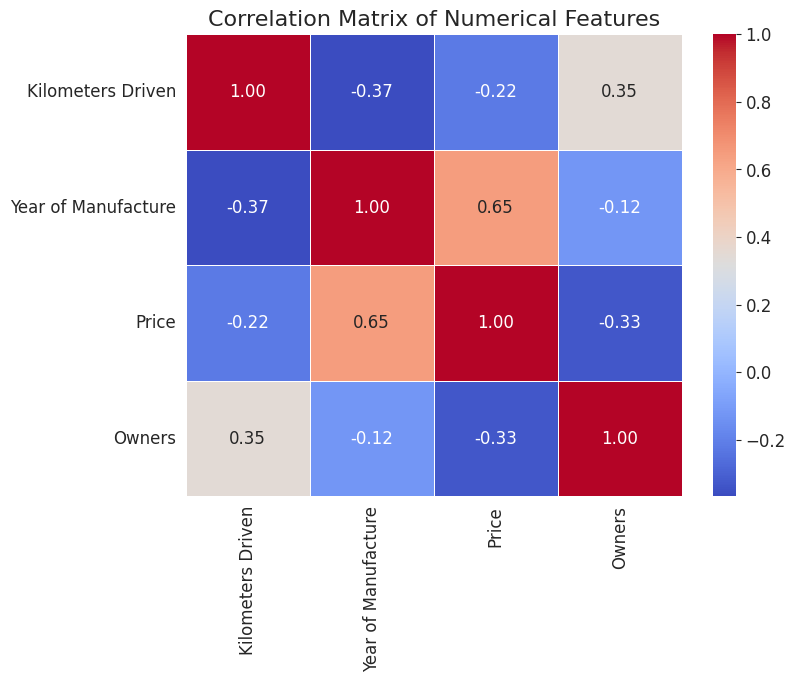

In [25]:
# 6. Correlation Analysis

print("\n--- Correlation Analysis ---")

numerical_cols = ['Kilometers Driven', 'Year of Manufacture', 'Price', 'Owners']
correlation_matrix = df[numerical_cols].corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [26]:
# Conclusion of EDA
print("\n--- EDA Summary ---")
print("The exploratory data analysis has provided insights into the cars24 dataset.")
print("Key observations include:")
print("- Data types were successfully converted for 'Kilometers Driven' and 'Price'.")
print("- New features 'Brand', 'Model', and 'City' were extracted for better analysis.")
print("- Price distribution is right-skewed, indicating a few high-priced cars.")
print("- Newer cars tend to have higher prices, and cars with fewer kilometers driven also command higher prices.")
print("- Petrol cars are most common, followed by Diesel and CNG.")
print("- Manual transmission cars are more prevalent than automatic ones.")
print("- Most cars are 1st owner vehicles.")
print("- Maruti is the dominant brand in the dataset.")
print("- Mumbai and Thane West are prominent locations for car listings.")
print("- There is a positive correlation between 'Year of Manufacture' and 'Price', and a negative correlation between 'Kilometers Driven' and 'Price'.")
print("These insights can be valuable for further modeling or business decisions.")



--- EDA Summary ---
The exploratory data analysis has provided insights into the cars24 dataset.
Key observations include:
- Data types were successfully converted for 'Kilometers Driven' and 'Price'.
- New features 'Brand', 'Model', and 'City' were extracted for better analysis.
- Price distribution is right-skewed, indicating a few high-priced cars.
- Newer cars tend to have higher prices, and cars with fewer kilometers driven also command higher prices.
- Petrol cars are most common, followed by Diesel and CNG.
- Manual transmission cars are more prevalent than automatic ones.
- Most cars are 1st owner vehicles.
- Maruti is the dominant brand in the dataset.
- Mumbai and Thane West are prominent locations for car listings.
- There is a positive correlation between 'Year of Manufacture' and 'Price', and a negative correlation between 'Kilometers Driven' and 'Price'.
These insights can be valuable for further modeling or business decisions.
